# Beyond the (Unimodal) Gaussian
### REAL Lab Group Meeting January 13th

<p float="left">
<img src="media/messages.png", width=500>
</p>

*Photo from Fourie et al*

## Nonparametric SAM

-  Fourie, D., Leonard, J., Kaess, M.: *A Nonparametric Belief Solution to the Bayes Tree* IEEE/RSJ Intl. Conf. on Intelligent Robots and Systems (IROS), (2016).
- Fourie, D., Vaz Teixeira, P., Leonard, J.: *Non-parametric Mixed-Manifold Products using Multiscale Kernel Densities*, IEEE Intl. Conf. on Intelligent Robots and Systems (IROS), (2019),.
- Doherty, K., Fourie, D., Leonard, J.: *Multimodal Semantic SLAM with Probabilistic Data Association*,  Intl. Conf. On Robotics and Automation (ICRA), IEEE, (2019).
- Fourie, D., Espinoza, A. T., Kaess, M., and Leonard, J. J.: *Characterizing marginalization and incremental operations on the Bayes tree*, International Workshop on Algorithmic Foundations of Robotics (WAFR), (2020),

## Nonlinear Least Squares and SAM

Given a set of mesurements $Z = {z_k}$, we want to estimate parameters $\Theta$ composed of poses $X = {x_i}$ and landmarks $L = {l_j}$

$$
\Theta^* = \textrm{argmax}_{\Theta} P(X,L,Z) \\
= \textrm{argmin}_{\Theta} - \log P(X,L,Z)
$$

If we have a measurement model $f()$, a process model $h()$, and assume gaussian noise, that equation becomes

$$
\Theta^* = \textrm{argmin}_{\theta}  
\sum_i ||f(x_{i-1}, u_i) - x_i||^2_{\Lambda_i} +
\sum_k ||h(x_{i_k}, l_{j_k}) - z_k||^2_{\Sigma_k}
$$



## Nonlinear Least Squares and SAM

We can linearize our measurememnt model
$$
h(x_{i_k}, l_{j_k}) - z_k \approx h(x^0_{i_k}, l^0_{j_k}) + H^{i_k}_k \delta x_{i_k} - J ^{j_k}_k \delta l_{j_k} -z_k \\
= H^{i_k}_k \delta x_{i_k} - J ^{j_k}_k \delta l_{j_k} - c_k
$$

and the process model 
$$
f(x_{i-1}, u_{i}) - x_i \approx f(x^0_{i-1}, u_i) + F^{i-1}_i \delta x_{i-1} - x^0_i \delta x_i= \\
= F^{i-1}_i \delta x_{i-1} - \delta x_{i} - a_i
$$

By combining $H$ $J$ and $F$ into matrix $A$, $c$ and $a$ into $b$ and our variables $\delta x$ $\delta l$ into $\delta$, we get the classic linear least squares problem

$$
\delta^* = \textrm{argmin}_\delta ||A \delta - b||
$$

## But Why am I Talking about this?
## Bayes Trees!
 Kaess, Michael, et al.: *The Bayes tree: An algorithmic foundation for probabilistic robot mapping*, Algorithmic Foundations of Robotics IX. Springer, Berlin, Heidelberg, 2010. 
 
> The optimal assignment x* can
be computed in dynamic programming style in one pass from the leaves up to the
root of the tree to define all functions, and then one pass down to retrieve the optimal
assignment for all frontal variables, which together make up the variables x. The first
pass is already performed during construction of the Bayes tree, and is represented
by the conditional densities associated with each clique. The second pass recovers
the optimal assignment starting from the root

1. Factor Graph to Bayes Net using varaible elimation 
2. Bayes Net to Bayes Tree using maximal cardinality search
3. Recover the optimal solution via backsubstitution from the root node down.




## Bayes Tree Algorithm
<img src="media/bayes_tree.png" />

## Bayes Tree Algorith: Variable Elimation

We use the (probability) chain rule to split the joint distribution $ f_{joint} (x_j, s_j) = P(x_j|s_j) f_{new} (s_j)$ where in the Gaussian case
$$
f_{joint} (x_j, s_j) \propto \exp\{||a x_j + A_s s_j + b||^2\}
$$
and the conditonal distribution becomes
$$
P(x_j|s_j) = \exp\{ \frac{1}{2} ( x_j + r s_j + d)^2 \}
$$
where $r = a^\dagger A_s$ and $ d = a^\dagger b$ where $a^\dagger$ is the pseudoinverse $(a^\top a)^{-1} a^\top$

the new seperator variable factor becomes
$$
f_{new} (s_j) \propto \exp \{ || A' s_j - b' ||^2 \}
$$
where $ A' = A_s - ar$ and $b' = b-ad$

<p float="center">
<img src="media/fg_to_bt_alg.png", width=500>
</p>

## Bayes Tree Algorithm: Recovering solution based on backsubstitution

we can get the optimal solution to $x_j$ from $P(x_j|s_j)$ as
$$
x_j = d - r s_j
$$

## Nonparametric Bayes Trees
<p float="left">
  <img src="media/lost_robot.png", width=300> <img src="media/multi_hypothesis.png", width=300>
</p>

## Belief Propagation inference on Probablistic Graphical Models


<img src="media/bp.png">

## Nonparametric Belief Propagation

Sudderth, E.B., Ihler, A.T., Isard, M., Freeman, W.T. and Willsky, A.S.: *Nonparametric belief propagation.* Communications of the ACM (2010)
### Multi Scale Gibbs sampling to approximate the Product of Functions
$$
{ x_{1,1}, x_{1,2}, ... , x_{1,N}}^{(i+1)} \sim [\hat{X}_1 | X^{(i)}_2, X^{(i)}_3 ] \\
{ x_{2,1}, x_{2,2}, ... , x_{2,N}}^{(i+1)} \sim [\hat{X}_2 | X^{(i+1)}_1, X^{(i)}_3 ] \\
{ x_{3,1}, x_{3,2}, ... , x_{3,N}}^{(i+1)} \sim [\hat{X}_3 | X^{(i+1)}_1, X^{(i+1)}_2 ] \\
$$

where the jth sample (i.e $x_{1,j}$) is conditioned on the other ith sample (so $[x^{(i+1)}_{1,j} | x^{(i)}_{2,j}, x^{(i)}_{3,j}]$)

### Kernel Density Estimates
$$
[\hat{X}] = \sum_i w^{(i)} \mathcal{N} (x; x^{(i)}, \Lambda^{(i)})
$$




## Gibbs Sampling of the Product of Gaussian Mixtures

Ihler A. T., Sudderth E. B., Freeman W. T., Willsky A. S.: *Efficient Multiscale Sampling from Products of Gaussian Mixtures* Neural Information Processing Systems (2003). 

<img src="media/gibbs_product.png">

In [1]:
using Logging
Logging.disable_logging(Logging.Warn)

LogLevel(1001)

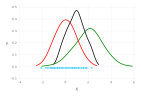

In [2]:
using KernelDensityEstimate

# bring in the plotting functions
using KernelDensityEstimatePlotting

p = kde!(randn(2,100))
q = kde!(2.0.+randn(2,100))
dummy = kde!(rand(2,100),[1.0]);
mcmciters = 5
pGM, = prodAppxMSGibbsS(dummy, [p;q], nothing, nothing, Niter=mcmciters)
pq = kde!(pGM)
Pl1 = plot([marginal(p,[1]);marginal(q,[1]);marginal(pq,[1])],c=["red";"green";"black"])

## Nonparameteric Bayes tree algorithm

1. Starting from the leaf nodes, use Gibbs sampling and KDE to construct the outgoing belief message for the seperator variables $\hat{m}(s_j)$. Repeat process while passing beliefs up to the root node.
2. Once the root node has converged to a solution, pass the beliefs back down the tree to get all marginal beliefs.

## 2D Example

In [3]:
# tell Julia that you want to use these modules/namespaces
using RoME, Distributions, LinearAlgebra

# start with an empty factor graph object
fg = initfg()

# Add the first pose :x0
addVariable!(fg, :x0, Pose2)

# Add at a fixed location PriorPose2 to pin :x0 to a starting location
addFactor!(fg, [:x0], PriorPose2(MvNormal(zeros(3), 0.01*Matrix(LinearAlgebra.I,3,3))) )

# Drive around in a hexagon
for i in 0:5
  psym = Symbol("x$i")
  nsym = Symbol("x$(i+1)")
  addVariable!(fg, nsym, Pose2)
  pp = Pose2Pose2(MvNormal([10.0;0;pi/3], Matrix(Diagonal([0.1;0.1;0.1].^2))))
  addFactor!(fg, [psym;nsym], pp )
end

# Add landmarks with Bearing range measurements
addVariable!(fg, :l1, Point2, tags=[:LANDMARK;])
addVariable!(fg, :l2, Point2, tags=[:LANDMARK;])
addFactor!(fg, [:l1], PriorPoint2(MvNormal([20.,-2], LinearAlgebra.diagm([0.1,0.1]))))
addFactor!(fg, [:l2], PriorPoint2(MvNormal([20.,22], LinearAlgebra.diagm([0.1,0.1]))))


# Add landmarks with Bearing range measurements
p2br = Pose2Point2BearingRange(Normal(0,0.1),Normal(20.0,1.0))
addFactor!(fg, [:x0; :l1; :l2], p2br, multihypo=[1.0; 0.5; 0.5])

p2br2 = Pose2Point2BearingRange(Normal(0,0.1),Normal(20.0,1.0))
addFactor!(fg, [:x6; :l1; :l2], p2br2, multihypo=[1.0; 0.5; 0.5])

drawGraph(fg)

getSolverParams(fg).drawtree = true
getSolverParams(fg).showtree = true
# perform inference, and remember first runs are slower owing to Julia's just-in-time compiling
tree = solveTree!(fg)

Building Bayes net...
Find potential functions for each clique


Solve Progress: approx max 144, at iter 71 	 Time: 0:00:25Solve Progress: approx max 144, at iter 56 	 Time: 0:00:2332mSolve Progress: approx max 144, at iter 4 	 Time: 0:00:00Solve Progress: approx max 144, at iter 5 	 Time: 0:00:00Solve Progress: approx max 144, at iter 6 	 Time: 0:00:00Solve Progress: approx max 144, at iter 7 	 Time: 0:00:00Solve Progress: approx max 144, at iter 59 	 Time: 0:00:24


MetaBayesTree
  Nr cliques:  6


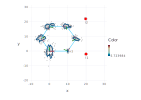

In [4]:
## Inter-operating visualization packages for Caesar/RoME/IncrementalInference exist
using RoMEPlotting

plotSLAM2D(fg, drawContour=true, drawEllipse=true, drawPoints=true)

## Nonparameteric distributions on Manifolds
Fourie, D., Vaz Teixeira, P., Leonard, J.: *Non-parametric Mixed-Manifold Products using Multiscale Kernel Densities*, IEEE Intl. Conf. on Intelligent Robots and Systems (IROS), (2019),.

The present a new way of performing Kernel Density estimates on Riemannian manifolds.

each kernel $k$ has it's distance metric $d()$ defined at the its mean point $\mu_i$ 
$$
[\hat{X}] = \sum_i w_i k(d(x,\mu_i))
$$

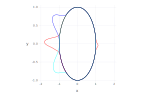

In [5]:
using ApproxManifoldProducts

using TransformUtils
const TU = TransformUtils

## create two densities

pts1 = TU.wrapRad.(0.1*randn(100).-pi.+0.5)
pts2 = TU.wrapRad.(0.1*randn(100).+pi.-0.5)

# pc1 = kde!_CircularNaiveCV(pts1)
# pc2 = kde!_CircularNaiveCV(pts2)
pc1 = kde!(pts1, [0.1;], (addtheta,) , (difftheta,))
pc2 = kde!(pts2, [0.1;], (addtheta,) , (difftheta,))

dummy = kde!(rand(100),[1.0;], (addtheta,), (difftheta,));

pGM, = prodAppxMSGibbsS(dummy, [pc1; pc2], nothing, nothing, Niter=2,
                          addop=(addtheta,), diffop=(difftheta,), getMu=(getCircMu,));


pc12 = kde!_CircularNaiveCV(pGM[:])
getBW(pc12)[1,1]
# pc12 = kde!(pGM, [0.05;], (addtheta,), (difftheta,))

pl = plotKDECircular([pc1;pc2; pc12], scale=0.07, c=["cyan";"blue";"red"])

## Nonparameteric distributions on Manifolds
<img src="media/micro_setup.png">
<img src="media/micro_hypothesis.png">

## Multimodal Semantic SLAM
<img src="media/mm_semantic.png">

## Multimodal Semantic SLAM

<video controls src="https://www.youtube.com/embed/9hEonD8KDrs">

## Why do I care?
<img src="media/gp.png">

## Newer Sampling Approaches
Huang, Q., Pu, C., Fourie, D., Khosoussi, K., How, J. P. Leonard, J. J.: *NF-iSAM: Incremental Smoothing and Mapping via Normalizing Flows*,  IEEE International Conference on Robotics and Automation (2021) 

<img src="media/flow.png">

Huang, Q., Papalia, A., Leonard, J. J.: *Nested Sampling for Non-Gaussian Inference in SLAM Factor Graphs* IEEE Robotics and Automation Letters (2021)